<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/Ass1Q3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [32]:
class LR:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
    def predict(self,X_test):

      return self.m * X_test + self.b

In [24]:

class PolynomialRegression:
    def __init__(self):
        pass

    def fit(self, X, y, degree):
        self.degree = degree
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])

        self.coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly.dot(self.coefficients)


In [23]:
class RidgeRegression:
    def __init__(self, alpha=0.1):
        self.alpha = alpha

    def fit(self, X, y, degree):
        self.degree = degree
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])

        identity_matrix = np.eye(X_poly.shape[1])
        self.coefficients = np.linalg.inv(X_poly.T.dot(X_poly) + self.alpha * identity_matrix).dot(X_poly.T).dot(y)

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly.dot(self.coefficients)

In [29]:
class LassoRegression:
    def __init__(self, alpha=0.1):
        self.alpha = alpha

    def soft_thresholding(self, x, lambda_):
        return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

    def fit(self, X, y, degree):
        self.degree = degree
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])

        n_features = X_poly.shape[1]
        self.coefficients = np.zeros(n_features)

        tolerance = 1e-4
        while True:
            coefficients_old = self.coefficients.copy()
            for j in range(n_features):
                tmp = X_poly[:, j].dot(y - X_poly.dot(self.coefficients) + self.coefficients[j] * X_poly[:, j])
                self.coefficients[j] = self.soft_thresholding(tmp, self.alpha) / (X_poly[:, j] ** 2).sum()

            if np.sum(np.abs(coefficients_old - self.coefficients)) < tolerance:
                break

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly.dot(self.coefficients)


In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

2.026976456174943
0.2326856677363755


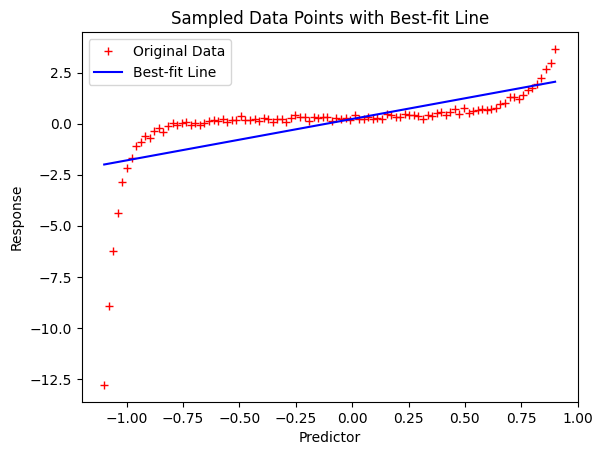

In [33]:
model_lin = LR()

model_lin.fit(predictor, response)

y_pred_lin= model_lin.predict(predictor)

plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(predictor, y_pred_lin, label='Best-fit Line', color='blue')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points with Best-fit Line')
plt.legend()
plt.show()

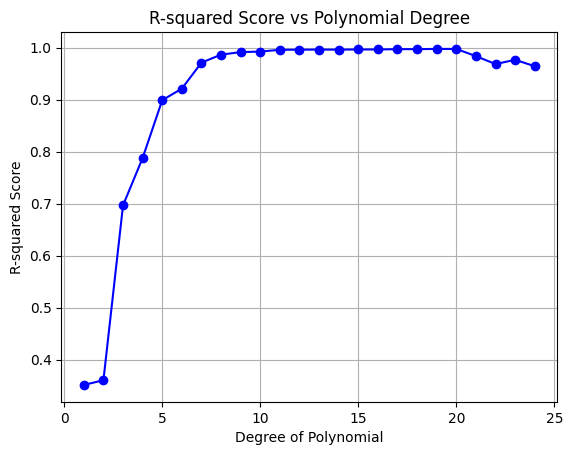

In [21]:
degrees = np.arange(1, 25)
r2_scores = []

for degree in degrees:
    poly_reg = PolynomialRegression()
    poly_reg.fit(predictor, response, degree)
    y_pred_poly = poly_reg.predict(predictor)
    r2 = r2_score(response, y_pred_poly)
    r2_scores.append(r2)

plt.plot(degrees, r2_scores, marker='o', color='blue')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs Polynomial Degree')
plt.grid(True)
plt.show()


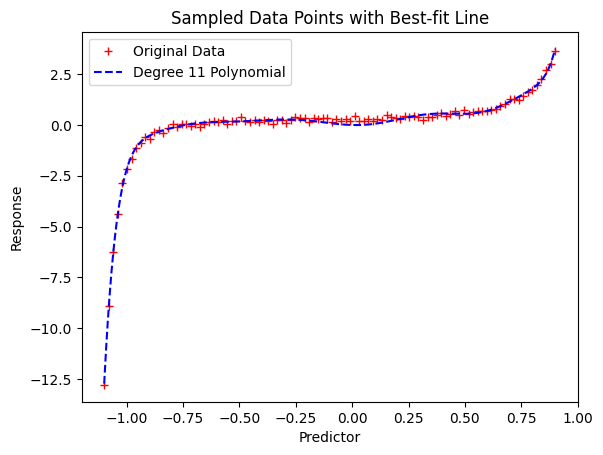

In [22]:
poly_reg_25 = PolynomialRegression()
poly_reg_25.fit(predictor, response, 11)
x_values_poly = np.linspace(min(predictor), max(predictor), 1000)
y_values_poly = poly_reg_25.predict(x_values_poly)
plt.plot(predictor, response, 'r+', label='Original Data')

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points with Best-fit Line')
plt.plot(x_values_poly, y_values_poly, color='blue', linestyle='--', label='Degree Best Polynomial')

plt.legend()
plt.show()



In [25]:
best_degree = 11

ridge_reg = RidgeRegression(alpha=0.1)
ridge_reg.fit(predictor, response, best_degree)
x_values_ridge = np.linspace(min(predictor), max(predictor), 1000)
y_values_ridge = ridge_reg.predict(x_values_ridge)

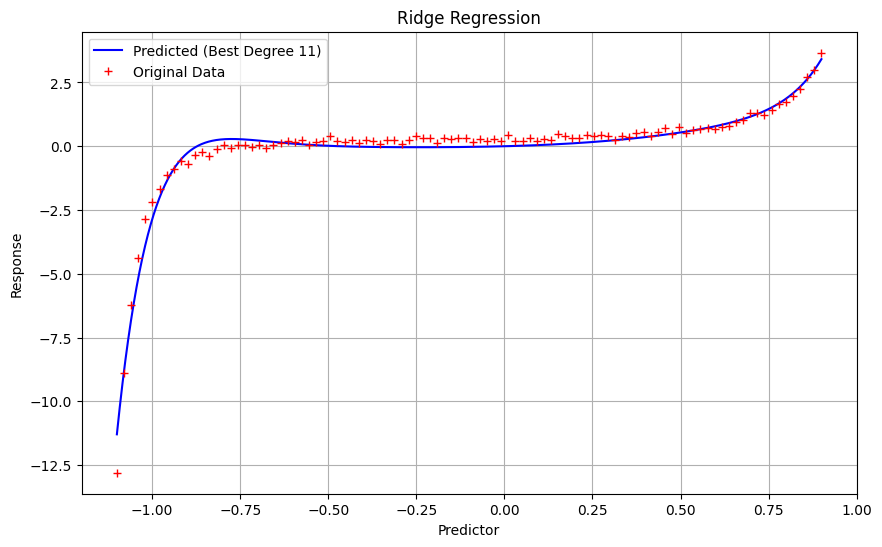

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x_values_ridge, y_values_ridge, color='blue', label=f'Predicted (Best Degree {best_degree})')
plt.plot(predictor, response, 'r+', label='Original Data')

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
best_degree = 11

lasso_reg = LassoRegression(alpha=0.1)
lasso_reg.fit(predictor, response, best_degree)

x_values_lasso = np.linspace(min(predictor), max(predictor), 1000)
y_values_lasso = lasso_reg.predict(x_values_lasso)

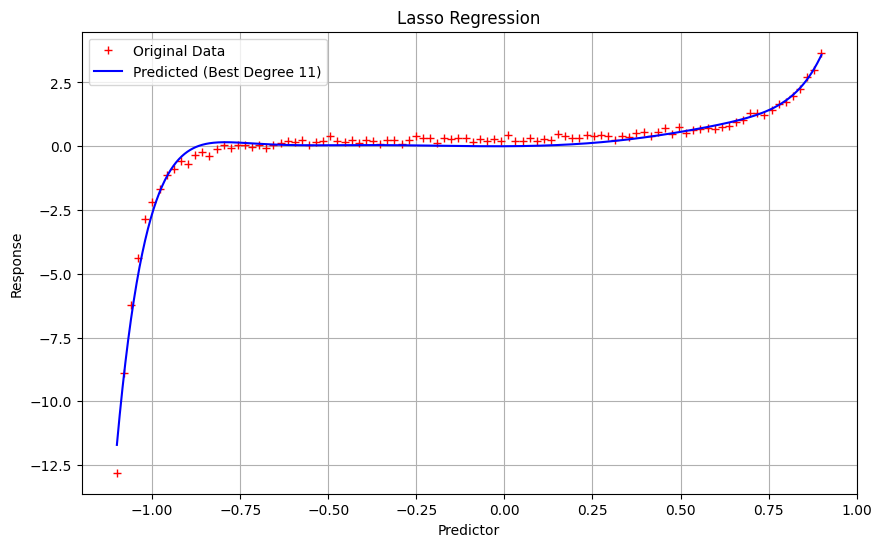

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(x_values_lasso, y_values_lasso, color='blue', label=f'Predicted (Best Degree {best_degree})')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
print(r2_scores)

[0.35117020687849876, 0.36019219071135855, 0.6965187320130004, 0.7875629536614613, 0.8987663647247052, 0.9209062690553297, 0.970888661433185, 0.986300480911124, 0.9911369685216537, 0.9922424573986046, 0.9955855792487225, 0.9958858603844476, 0.9959643034224528, 0.9959656886296412, 0.9962338033512386, 0.9962380304353228, 0.9968590483539587, 0.9968683206182428, 0.9973027031808337, 0.9972520150933551, 0.9834500090626568, 0.9681818654017358, 0.9763271964294246, 0.9640703262078414]
